# Room Cancellation Classification

In this assignment, you will be performing EDA and predictive modelling on a dataset of hotel reservations. The dataset is available from the attached `hotel_bookings.csv` file.

In this Jupyter notebook, please, document your results and the way you have obtained them. The results of each sub-question should be printed as the result of its corresponding cell.
Please make sure that the datasets and other outputs are easily identifiable, i.e. use descriptive names for as is suitable for each corresponding question.
Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner. _Please do not change the general structure of this notebook_. You can, however, **add additional markdown or code cells** if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

**Submission instructions**:
For submission, make a zip file containing your notebook and the attached dataset and name it as `<your_roll_number>_a3.zip` 

In [63]:
# Add all imports here

import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import rcParams
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
# add more when required

rcParams["figure.figsize"] = 20, 10

In [64]:
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Data Description

[Original Source](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

This data consists of room reservations for two hotels: (i) a city hotel and (ii) a resort hotel. The columns are described as follows:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|


## Part 0

The `children`, `adults` and `babies` columns cannot have a value of zero simultaneously. Filter out the rows, which show this behavior

In [117]:
# Create a mask to identify rows where 'children', 'adults', and 'babies' are all zero
filtered_df = df[~(df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)]

# Create a new DataFrame excluding rows where 'children', 'adults', and 'babies' are all zero
print("Filtered Rows")

#  the resulting DataFrame without rows where 'children', 'adults', and 'babies' are all zero
print(filtered_df.head())

Filtered Rows
            hotel  is_canceled  lead_time  arrival_date_year  \
40984  City Hotel            0          1               2015   
41048  City Hotel            0        104               2015   
41446  City Hotel            0          3               2015   
41952  City Hotel            0         15               2015   
45158  City Hotel            1         48               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40984             August                        33                         10   
41048             August                        33                         11   
41446             August                        34                         16   
41952             August                        35                         28   
45158            October                        43                         19   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40984                        1               

In [118]:
filtered_df["children"].head()

40984    3.0
41048    2.0
41446    2.0
41952    2.0
45158    2.0
Name: children, dtype: float64

## Part A - EDA

To make ourselves familiar with the data, we will start with an explorative data analysis. In this part, you will be making different visualizations to support your answers.

For each sub-question, a separate and single subplot should be shown. You also need to decide the optimal visualization for each case and use that.

### Question 1

#### (a)
Determine and visualize the top 10 countries and guest counts from which the maximum number of guests are coming from.

#### (b)
Repeat (a) but show the guest counts for the city and resort hotels separately. They both should be shown in the same plot

#### (c)
Repeat (b) for the non-cancelled bookings


Each part should be done in a separate cell

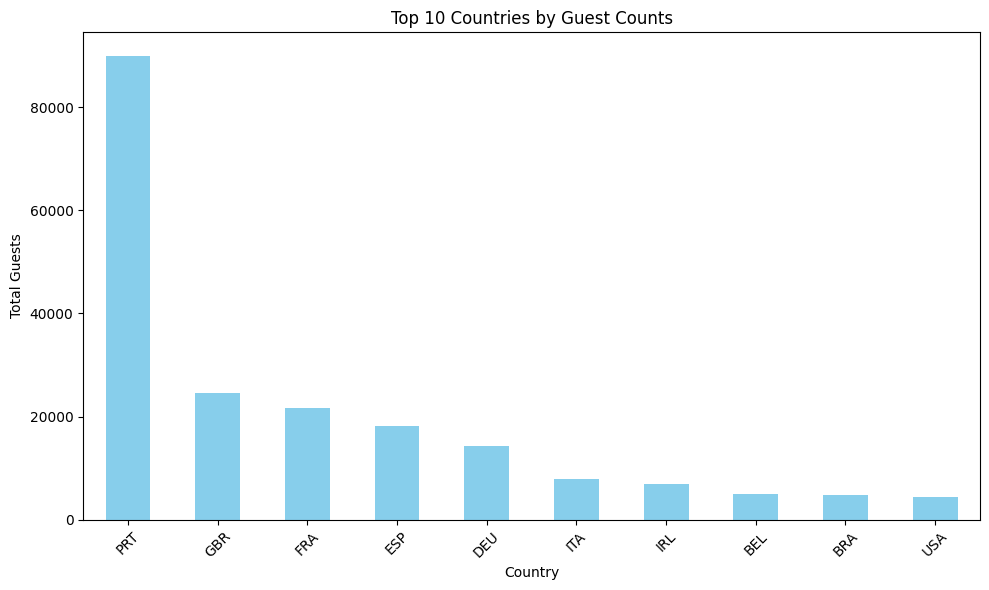

In [66]:
# Grouping by country and summing up the total number of guests
guests_by_country = df.groupby('country')[['adults', 'children', 'babies']].sum()
guests_by_country['total_guests'] = guests_by_country.sum(axis=1)

# Select top 10 countries by total guests
top_10_countries = guests_by_country['total_guests'].nlargest(10)

# Plotting the top 10 countries by guest counts
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Guest Counts')
plt.xlabel('Country')
plt.ylabel('Total Guests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

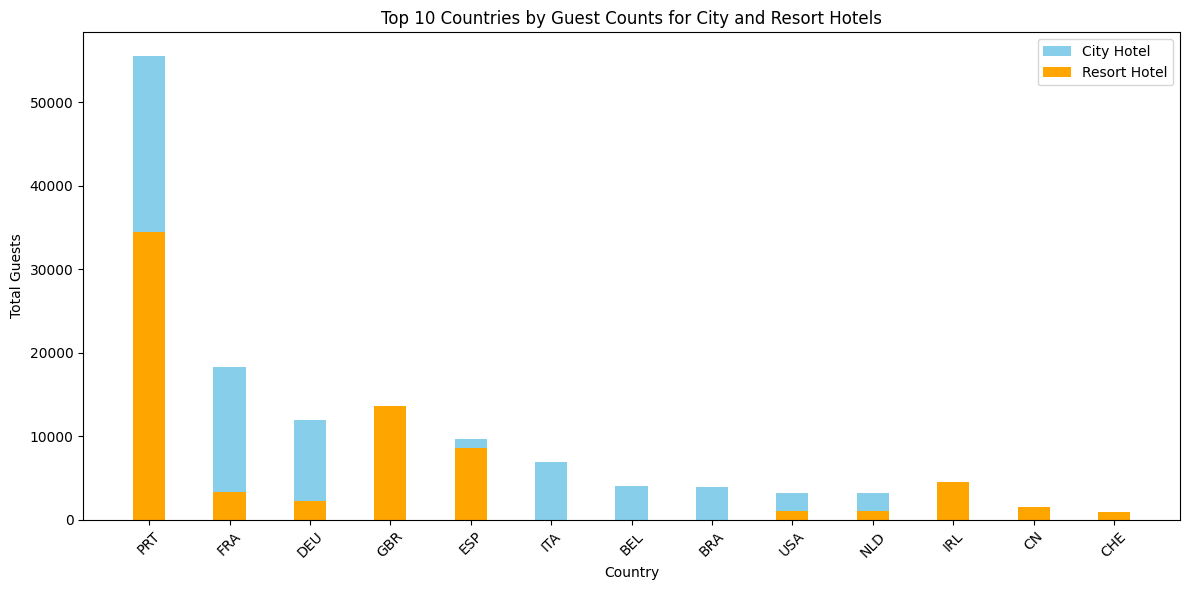

In [67]:
# Filter data for city and resort hotels separately
city_hotel = df[df['hotel'] == 'City Hotel']
resort_hotel = df[df['hotel'] == 'Resort Hotel']

# Grouping by country for city and resort hotels separately and summing up the total number of guests
guests_city_hotel = city_hotel.groupby('country')[['adults', 'children', 'babies']].sum()
guests_city_hotel['total_guests'] = guests_city_hotel.sum(axis=1)

guests_resort_hotel = resort_hotel.groupby('country')[['adults', 'children', 'babies']].sum()
guests_resort_hotel['total_guests'] = guests_resort_hotel.sum(axis=1)

# Select top 10 countries by total guests for city and resort hotels separately
top_10_countries_city = guests_city_hotel['total_guests'].nlargest(10)
top_10_countries_resort = guests_resort_hotel['total_guests'].nlargest(10)

# Plotting the top 10 countries by guest counts for city and resort hotels separately in a grouped bar plot
plt.figure(figsize=(12, 6))

plt.bar(top_10_countries_city.index, top_10_countries_city, width=0.4, label='City Hotel', color='skyblue')
plt.bar(top_10_countries_resort.index, top_10_countries_resort, width=0.4, label='Resort Hotel', color='orange')

plt.title('Top 10 Countries by Guest Counts for City and Resort Hotels')
plt.xlabel('Country')
plt.ylabel('Total Guests')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

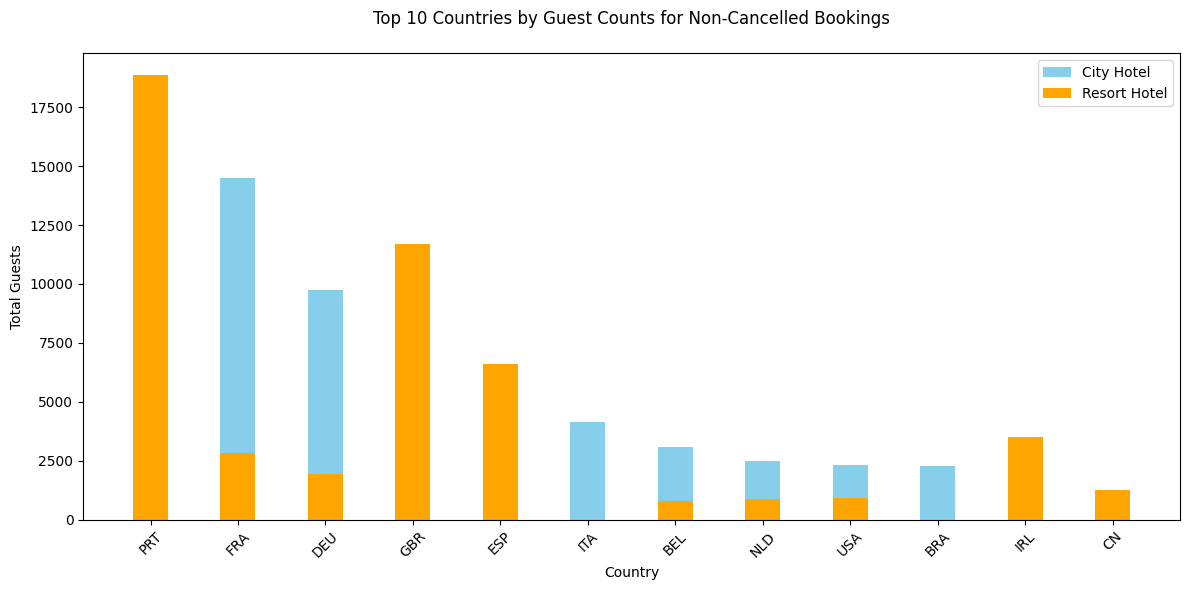

In [68]:

# Filter non-cancelled bookings for city and resort hotels separately
non_cancelled_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
non_cancelled_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]

# Grouping by country for non-cancelled bookings of city and resort hotels separately and summing up the total number of guests
guests_non_cancelled_city = non_cancelled_city.groupby('country')[['adults', 'children', 'babies']].sum()
guests_non_cancelled_city['total_guests'] = guests_non_cancelled_city.sum(axis=1)

guests_non_cancelled_resort = non_cancelled_resort.groupby('country')[['adults', 'children', 'babies']].sum()
guests_non_cancelled_resort['total_guests'] = guests_non_cancelled_resort.sum(axis=1)

# Select top 10 countries by total guests for non-cancelled bookings of city and resort hotels separately
top_10_countries_non_cancelled_city = guests_non_cancelled_city['total_guests'].nlargest(10)
top_10_countries_non_cancelled_resort = guests_non_cancelled_resort['total_guests'].nlargest(10)

# Plotting the top 10 countries by guest counts for non-cancelled bookings of city and resort hotels separately in a grouped bar plot
plt.figure(figsize=(12, 6))

plt.bar(top_10_countries_non_cancelled_city.index, top_10_countries_non_cancelled_city, width=0.4, label='City Hotel', color='skyblue')
plt.bar(top_10_countries_non_cancelled_resort.index, top_10_countries_non_cancelled_resort, width=0.4, label='Resort Hotel', color='orange')

plt.title('Top 10 Countries by Guest Counts for Non-Cancelled Bookings\n')
plt.xlabel('Country')
plt.ylabel('Total Guests')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Question 2
Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of the average amount (adr), the guests are charged per night for each room type.

#### (b)
Repeat (a) but separate the results for each hotel. A single plot should be shown


C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\2874345357.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='reserved_room_type', y='adr', data=non_cancelled_bookings, palette='Set3')


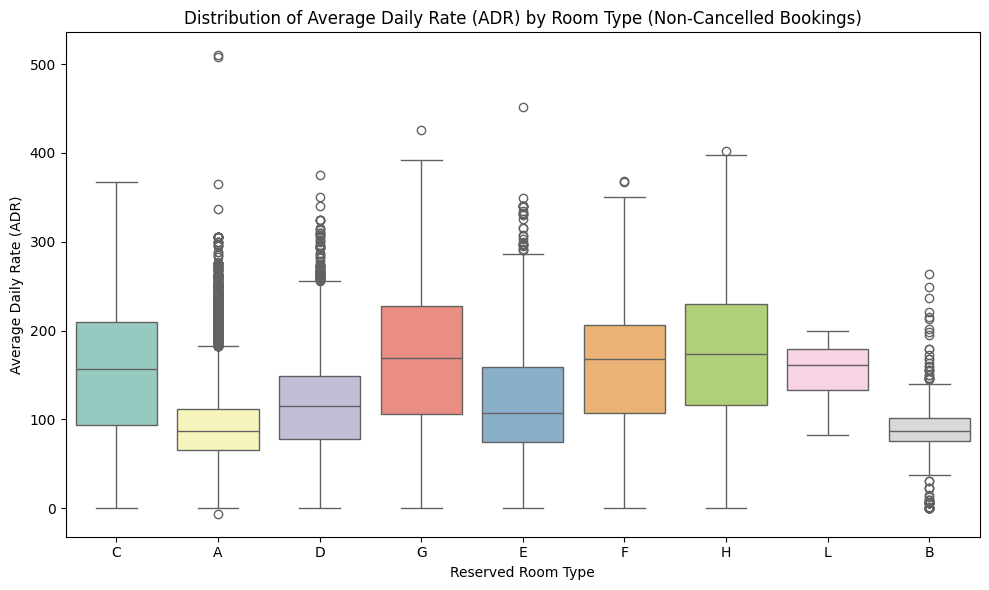

In [69]:
# Filter non-cancelled bookings
non_cancelled_bookings = df[df['is_canceled'] == 0]

# Plotting the distribution of ADR for each room type using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='reserved_room_type', y='adr', data=non_cancelled_bookings, palette='Set3')
plt.title('Distribution of Average Daily Rate (ADR) by Room Type (Non-Cancelled Bookings)')
plt.xlabel('Reserved Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show()

C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\3466369046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='hotel', y='adr', data=pd.concat([non_cancelled_city, non_cancelled_resort]), palette='Pastel1')


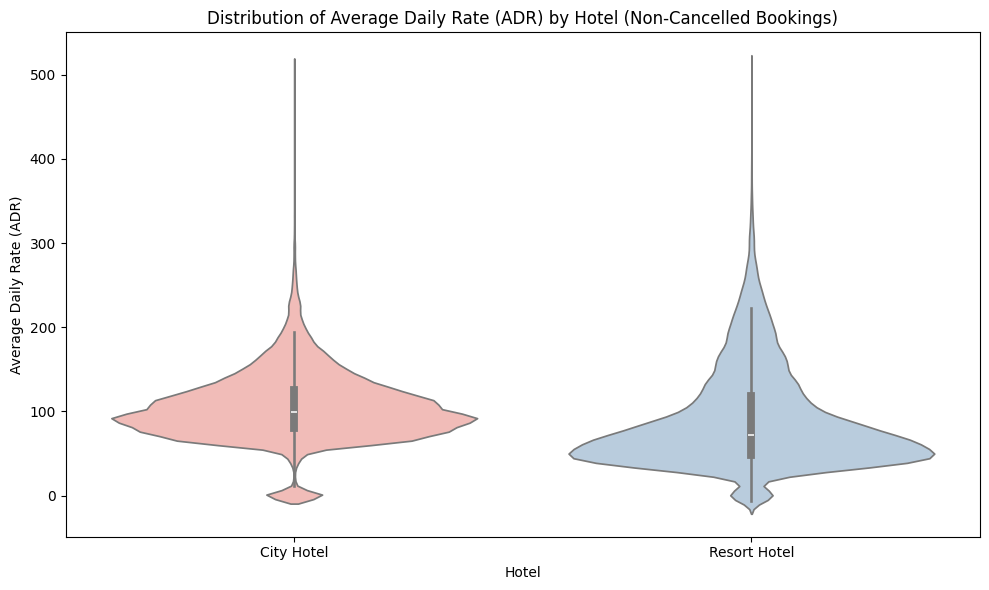

In [70]:
# Filter non-cancelled bookings for city and resort hotels separately
non_cancelled_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
non_cancelled_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]

# Plotting the distribution of ADR for each hotel using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='hotel', y='adr', data=pd.concat([non_cancelled_city, non_cancelled_resort]), palette='Pastel1')
plt.title('Distribution of Average Daily Rate (ADR) by Hotel (Non-Cancelled Bookings)')
plt.xlabel('Hotel')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show()

### Question 3
Consider the non-cancelled bookings only.

#### (a)
Plot the mean values for `adr` by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the mean values for `adr` by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.



C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\1122396.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_cancelled_bookings['arrival_date_month'] = pd.Categorical(non_cancelled_bookings['arrival_date_month'],
C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\1122396.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_adr_by_month_hotel = non_cancelled_bookings.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()


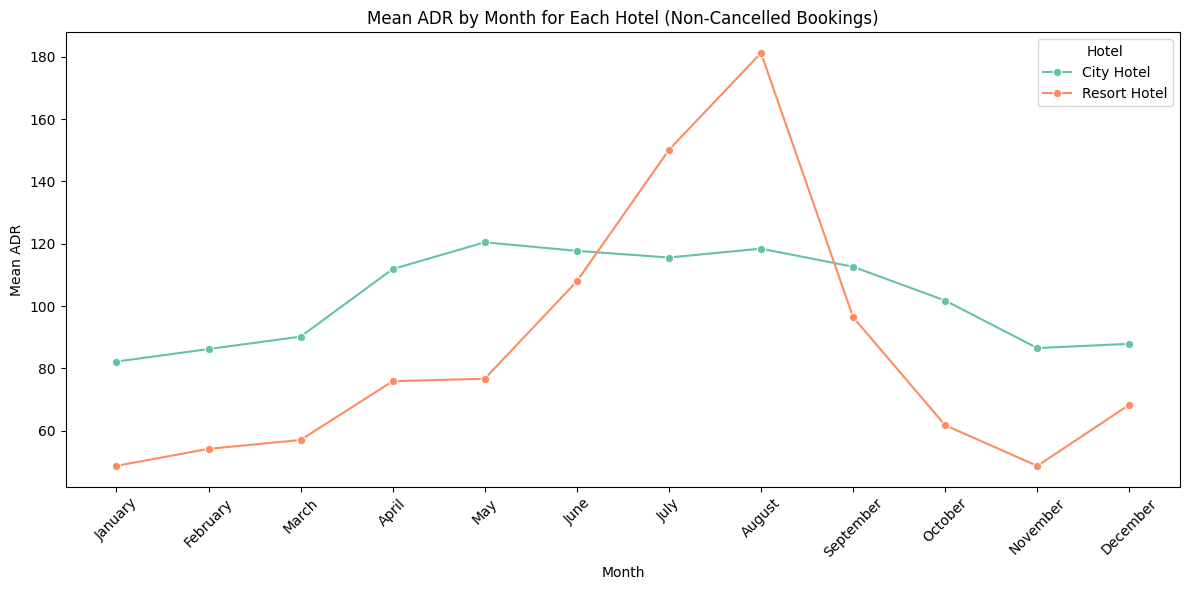

In [71]:
# Filter non-cancelled bookings
non_cancelled_bookings = df[df['is_canceled'] == 0]

# Extracting month from 'arrival_date_month' and converting it to a categorical variable
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

non_cancelled_bookings['arrival_date_month'] = pd.Categorical(non_cancelled_bookings['arrival_date_month'],
                                                             categories=month_order,
                                                             ordered=True)

# Grouping by month and hotel to calculate mean ADR
mean_adr_by_month_hotel = non_cancelled_bookings.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Plotting mean ADR by month for each hotel
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=mean_adr_by_month_hotel, palette='Set2', marker='o')
plt.title('Mean ADR by Month for Each Hotel (Non-Cancelled Bookings)')
plt.xlabel('Month')
plt.ylabel('Mean ADR')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()


C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\195710656.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_cancelled_bookings['arrival_date'] = pd.to_datetime(
C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\195710656.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_cancelled_bookings['day_of_week'] = non_cancelled_bookings['arrival_date'].dt.day_name()


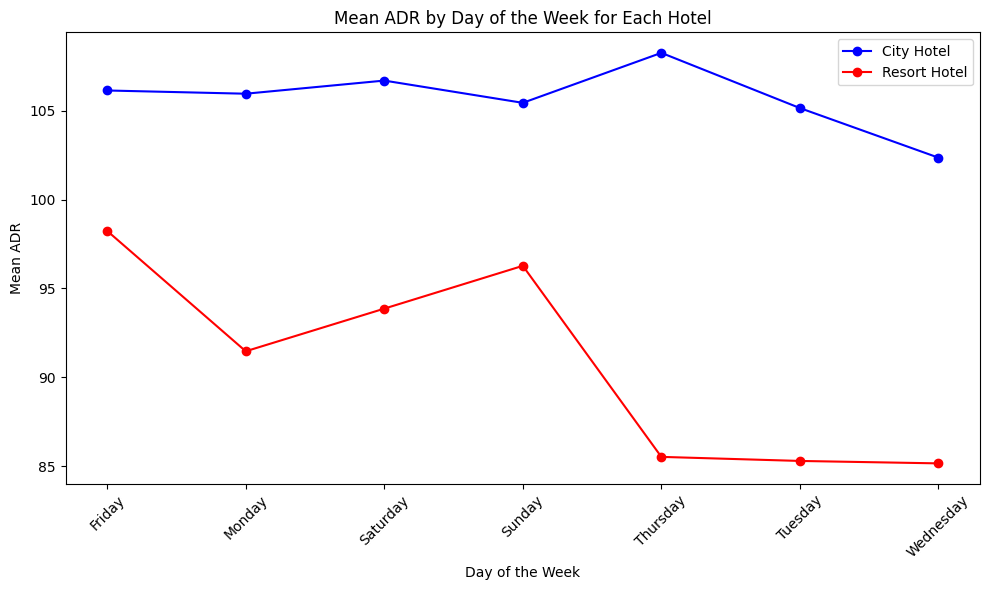

In [72]:
# Read the dataset
data = pd.read_csv("hotel_bookings.csv")

# Filter non-cancelled bookings
non_cancelled_bookings = data[data['is_canceled'] == 0]

# Convert 'arrival_date' to datetime
non_cancelled_bookings['arrival_date'] = pd.to_datetime(
    non_cancelled_bookings['arrival_date_year'].astype(str) + '-' +
    non_cancelled_bookings['arrival_date_month'].astype(str) + '-' +
    non_cancelled_bookings['arrival_date_day_of_month'].astype(str)
)

# Extract day of the week
non_cancelled_bookings['day_of_week'] = non_cancelled_bookings['arrival_date'].dt.day_name()

# Calculate mean 'adr' for each day of the week, grouped by hotel
mean_adr_by_day = non_cancelled_bookings.groupby(['hotel', 'day_of_week'])['adr'].mean().reset_index()

# Sort days of the week in order
days_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]
mean_adr_by_day['day_of_week'] = pd.Categorical(
    mean_adr_by_day['day_of_week'], categories=days_order, ordered=True
)

# Plot mean 'adr' by day of the week for each hotel
plt.figure(figsize=(10, 6))
for hotel, color in zip(mean_adr_by_day['hotel'].unique(), ['blue', 'red']):
    subset = mean_adr_by_day[mean_adr_by_day['hotel'] == hotel]
    plt.plot(subset['day_of_week'], subset['adr'], marker='o', linestyle='-', color=color, label=hotel)

plt.title('Mean ADR by Day of the Week for Each Hotel')
plt.xlabel('Day of the Week')
plt.ylabel('Mean ADR')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Question 4

Consider the non-cancelled bookings only.

#### (a)

Plot the guest counts by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the guest counts by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

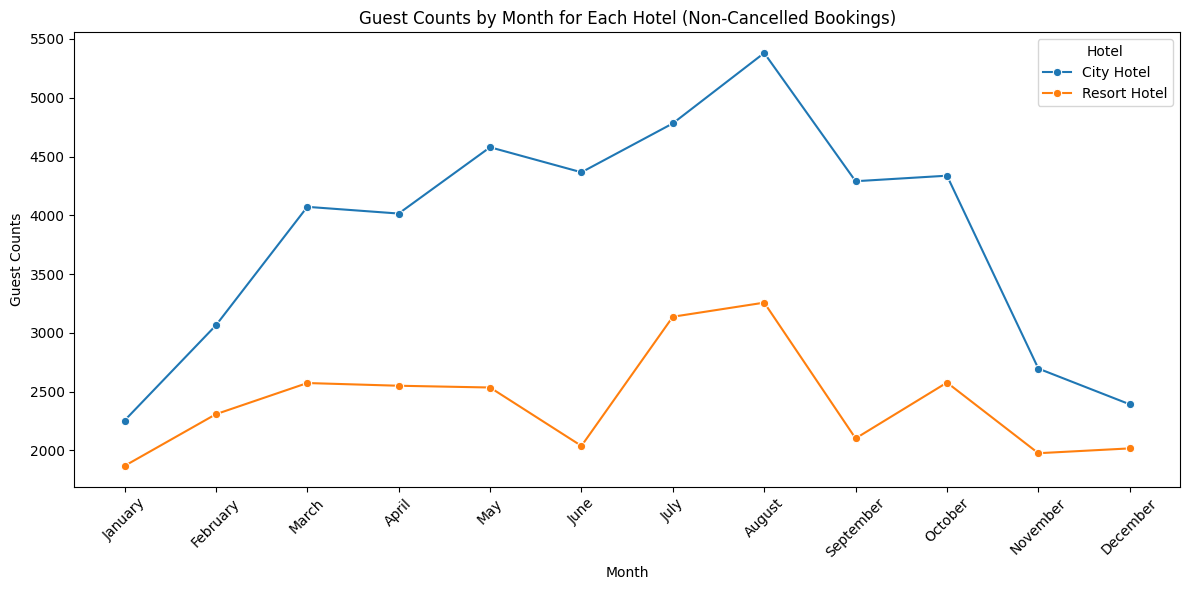

In [73]:
# Filter non-cancelled bookings
non_cancelled_bookings = df[df['is_canceled'] == 0]

# Grouping by hotel and arrival month to count guests
guest_counts_by_month_hotel = non_cancelled_bookings.groupby(['arrival_date_month', 'hotel'])['adults'].count().reset_index()

# Define an ordered list of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to a categorical variable with the defined order
guest_counts_by_month_hotel['arrival_date_month'] = pd.Categorical(guest_counts_by_month_hotel['arrival_date_month'],
                                                                  categories=month_order,
                                                                  ordered=True)

# Plotting guest counts by month for each hotel
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='adults', hue='hotel', data=guest_counts_by_month_hotel, marker='o')
plt.title('Guest Counts by Month for Each Hotel (Non-Cancelled Bookings)')
plt.xlabel('Month')
plt.ylabel('Guest Counts')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()

C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\2741229866.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_cancelled_bookings['arrival_date'] = pd.to_datetime(
C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\2741229866.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_cancelled_bookings['day_of_week'] = non_cancelled_bookings['arrival_date'].dt.day_name()
C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\2741229866.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

<Figure size 1000x600 with 0 Axes>

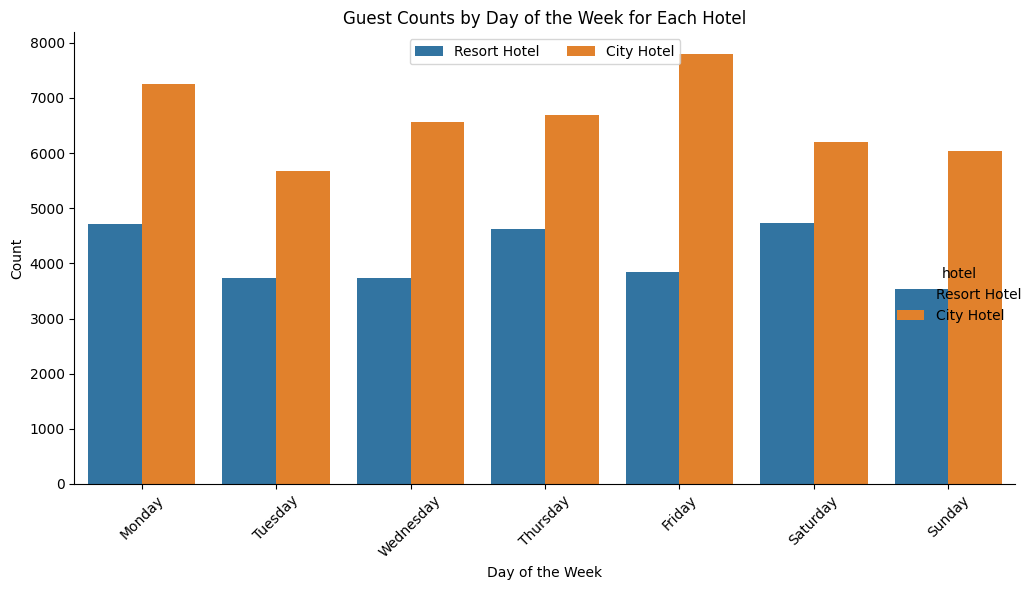

In [74]:
# Read the dataset
data = pd.read_csv("hotel_bookings.csv")

# Filter non-cancelled bookings
non_cancelled_bookings = data[data['is_canceled'] == 0]

# Convert 'arrival_date' to datetime
non_cancelled_bookings['arrival_date'] = pd.to_datetime(
    non_cancelled_bookings['arrival_date_year'].astype(str) + '-' +
    non_cancelled_bookings['arrival_date_month'].astype(str) + '-' +
    non_cancelled_bookings['arrival_date_day_of_month'].astype(str)
)

# Extract day of the week
non_cancelled_bookings['day_of_week'] = non_cancelled_bookings['arrival_date'].dt.day_name()

# Reorder days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
non_cancelled_bookings['day_of_week'] = pd.Categorical(non_cancelled_bookings['day_of_week'], categories=days_order, ordered=True)

# Plotting using Seaborn's catplot
plt.figure(figsize=(10, 6))
sns.catplot(x='day_of_week', kind='count', hue='hotel', data=non_cancelled_bookings, height=6, aspect=1.5, order=days_order)
plt.title('Guest Counts by Day of the Week for Each Hotel')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)  # Move legend to upper center
plt.tight_layout()
plt.show()


### Question 5

Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of stay duration (in number of days) of guests at each hotel.

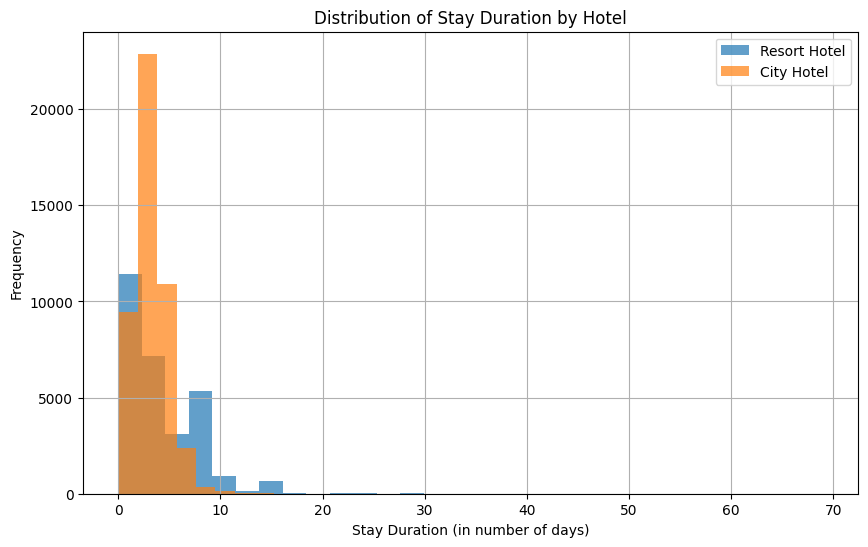

In [75]:
import matplotlib.pyplot as plt

# Filter the data for non-cancelled bookings
non_cancelled = df[df['is_canceled'] == 0]

# Create separate dataframes for each hotel
resort_hotel = non_cancelled[non_cancelled['hotel'] == 'Resort Hotel']
city_hotel = non_cancelled[non_cancelled['hotel'] == 'City Hotel']

# Plot the distribution of stay duration for each hotel
plt.figure(figsize=(10, 6))

plt.hist(resort_hotel['stays_in_weekend_nights'] + resort_hotel['stays_in_week_nights'],
         bins=30, alpha=0.7, label='Resort Hotel')
plt.hist(city_hotel['stays_in_weekend_nights'] + city_hotel['stays_in_week_nights'],
         bins=30, alpha=0.7, label='City Hotel')

plt.xlabel('Stay Duration (in number of days)')
plt.ylabel('Frequency')
plt.title('Distribution of Stay Duration by Hotel')
plt.legend()
plt.grid(True)
plt.show()


### Question 6

#### (a), (b) & (c)
Make three visualizations, showing some interesting insights from the data. 

The visualizations should be accompanied by a brief textual description highlighting your finding.

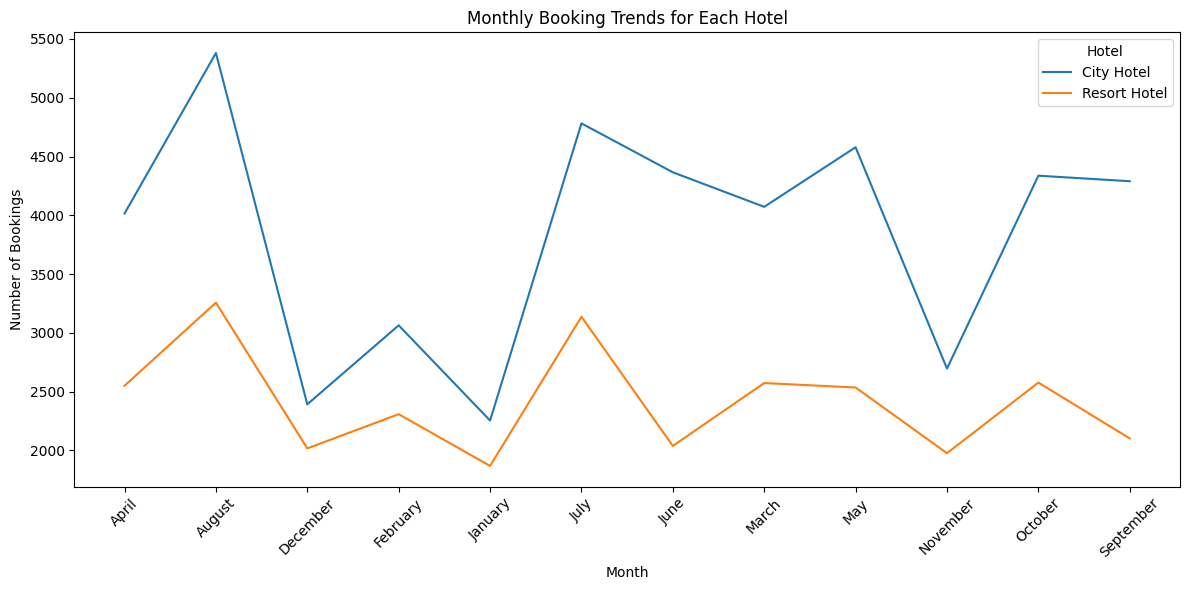

In [76]:
# Filter non-cancelled bookings
non_cancelled_bookings = df[df['is_canceled'] == 0]

# Group by hotel and arrival date month to count bookings
monthly_bookings = non_cancelled_bookings.groupby(['arrival_date_month', 'hotel']).size().reset_index(name='booking_count')

# Plotting monthly booking trends for each hotel
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='booking_count', hue='hotel', data=monthly_bookings)
plt.title('Monthly Booking Trends for Each Hotel')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()

The figure illustrates the monthly booking trends for each hotel type. It shows the fluctuations in bookings throughout the year for city and resort hotels. For instance, city hotels might experience higher booking volumes during business months, while resort hotels might have peak seasons during summer months.

C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\991987000.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_cancelled_bookings['arrival_date'] = pd.to_datetime(non_cancelled_bookings['arrival_date_year'].astype(str) + '-' + non_cancelled_bookings['arrival_date_month'] + '-' + non_cancelled_bookings['arrival_date_day_of_month'].astype(str))
C:\Users\Cr7th\AppData\Local\Temp\ipykernel_21192\991987000.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_cancelled_bookings['reservation_status_date'] 

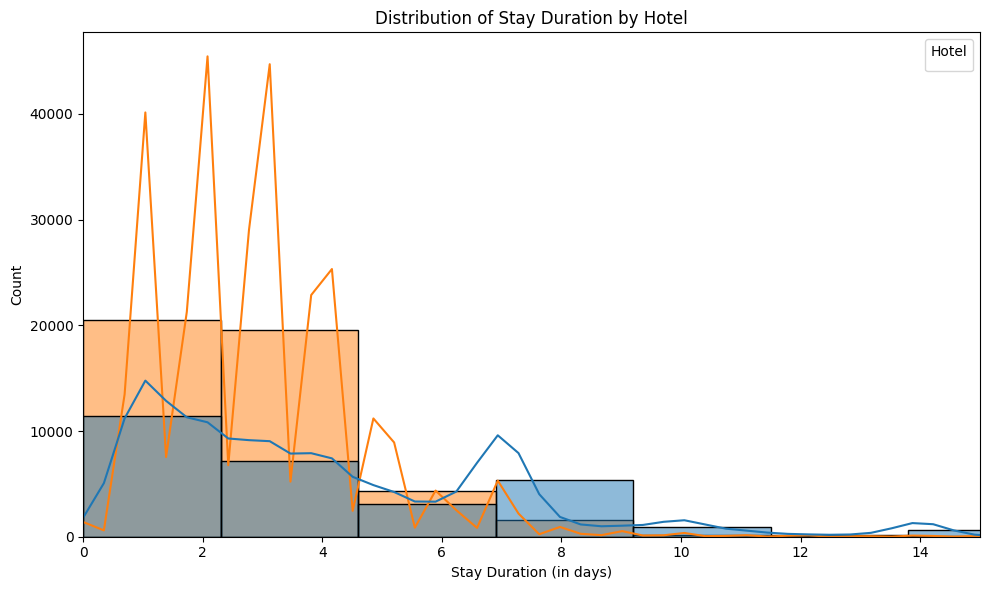

In [77]:

# Filter non-cancelled bookings
non_cancelled_bookings = df[df['is_canceled'] == 0]

# Combine arrival_date columns to create a consistent arrival date
non_cancelled_bookings['arrival_date'] = pd.to_datetime(non_cancelled_bookings['arrival_date_year'].astype(str) + '-' + non_cancelled_bookings['arrival_date_month'] + '-' + non_cancelled_bookings['arrival_date_day_of_month'].astype(str))

# Convert reservation_status_date column to a consistent date format
non_cancelled_bookings['reservation_status_date'] = pd.to_datetime(non_cancelled_bookings['reservation_status_date'])

# Calculate duration of stay in days
non_cancelled_bookings['stay_duration'] = (non_cancelled_bookings['reservation_status_date'] - non_cancelled_bookings['arrival_date']).dt.days

# Plotting the distribution of stay duration for each hotel with modified x-axis range
plt.figure(figsize=(10, 6))
sns.histplot(data=non_cancelled_bookings, x='stay_duration', hue='hotel', bins=30, kde=True)
plt.title('Distribution of Stay Duration by Hotel')
plt.xlabel('Stay Duration (in days)')
plt.ylabel('Count')
plt.legend(title='Hotel')
plt.xlim(0, 15)  # Set the x-axis limit from 0 to 15 days
plt.tight_layout()
plt.show()


This plot depicts the distribution of stay durations (in days) for guests at each hotel. It showcases differences in the length of stays between city hotels and resort hotels. It might reveal that guests at resort hotels tend to have longer stays compared to those at city hotels.

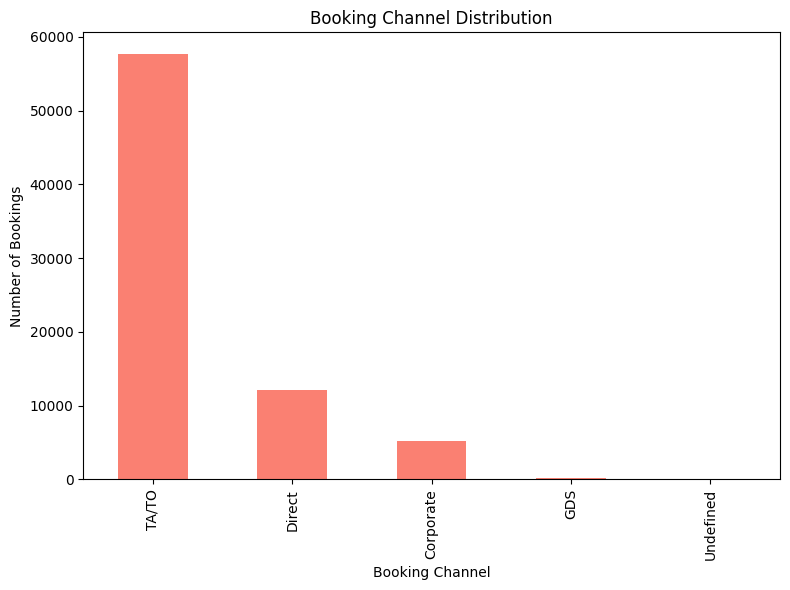

In [78]:
non_cancelled_bookings = df[df['is_canceled'] == 0]

# Count of bookings by different booking channels
booking_channel_counts = non_cancelled_bookings['distribution_channel'].value_counts()

# Plotting the distribution of booking channels
plt.figure(figsize=(8, 6))
booking_channel_counts.plot(kind='bar', color='salmon')
plt.title('Booking Channel Distribution')
plt.xlabel('Booking Channel')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

This illustration shows the distribution of bookings made through different booking channels (e.g., travel agents, online travel agencies, direct bookings). It provides insights into which channels are more frequently used for hotel reservations.

## Part B - Pre-processing

For this part, **you are required to document the reasoning behind all the data transformations you devise and the insights you gain from each question.** Create **markdown cells** to add your answers. 

### Task Description

The task is to classify whether a booking will be cancelled or not. 


### Question 1
**Feature Selection**

#### (a)
List the features which seem to contribute to data leakage. These will be the features which are related to the predicitve target, but would not be available at prediction time in a real-world setting. 

#### (b)
Find out the percent of missing values of each column and visualize using [missingno](https://github.com/ResidentMario/missingno) . Which features have too many missing values? And which features have sufficiently low number of missing values, such that they can be safely imputed without significantly affecting the overall data distribution.

#### (c)
Visualize the correlations among the different input features.

#### (d)
Find out the correlation of each of the input features with the target attribute.

#### (e)
Using your answers to the previous parts, filter out the irrelevant features from the dataset.

Remember to document your findings for each part.

# a) 
"reservation_status" and "reservation_status_date" 
Using them during modeling, booking_changes, or days_in_waiting_list could be considered as potential sources of data leakage. These features contain information about the booking status or changes, which are only available after the booking process is complete, hence not available at the time of prediction.

# b)

In [79]:
df = pd.read_csv("hotel_bookings.csv")

# Calculate percentage of missing values in each column
missing_percentage = round((df.isnull().sum() / len(df)) * 100)

print("Percentage of missing values in each column(Values greater than 0):")
print(round(missing_percentage))

Percentage of missing values in each column(Values greater than 0):
hotel                              0.0
is_canceled                        0.0
lead_time                          0.0
arrival_date_year                  0.0
arrival_date_month                 0.0
arrival_date_week_number           0.0
arrival_date_day_of_month          0.0
stays_in_weekend_nights            0.0
stays_in_week_nights               0.0
adults                             0.0
children                           0.0
babies                             0.0
meal                               0.0
country                            0.0
market_segment                     0.0
distribution_channel               0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
reserved_room_type                 0.0
assigned_room_type                 0.0
booking_changes                    0.0
deposit_type                       0.0
agent                             1

Company has highest number of missing values 94% and then comes agent. The percentage of missing values varies across different columns. The more the columns have missing values the more they rank higher not to be used in the model/analysis because of the uncertainty they bring or lack of accuracy.

# c)

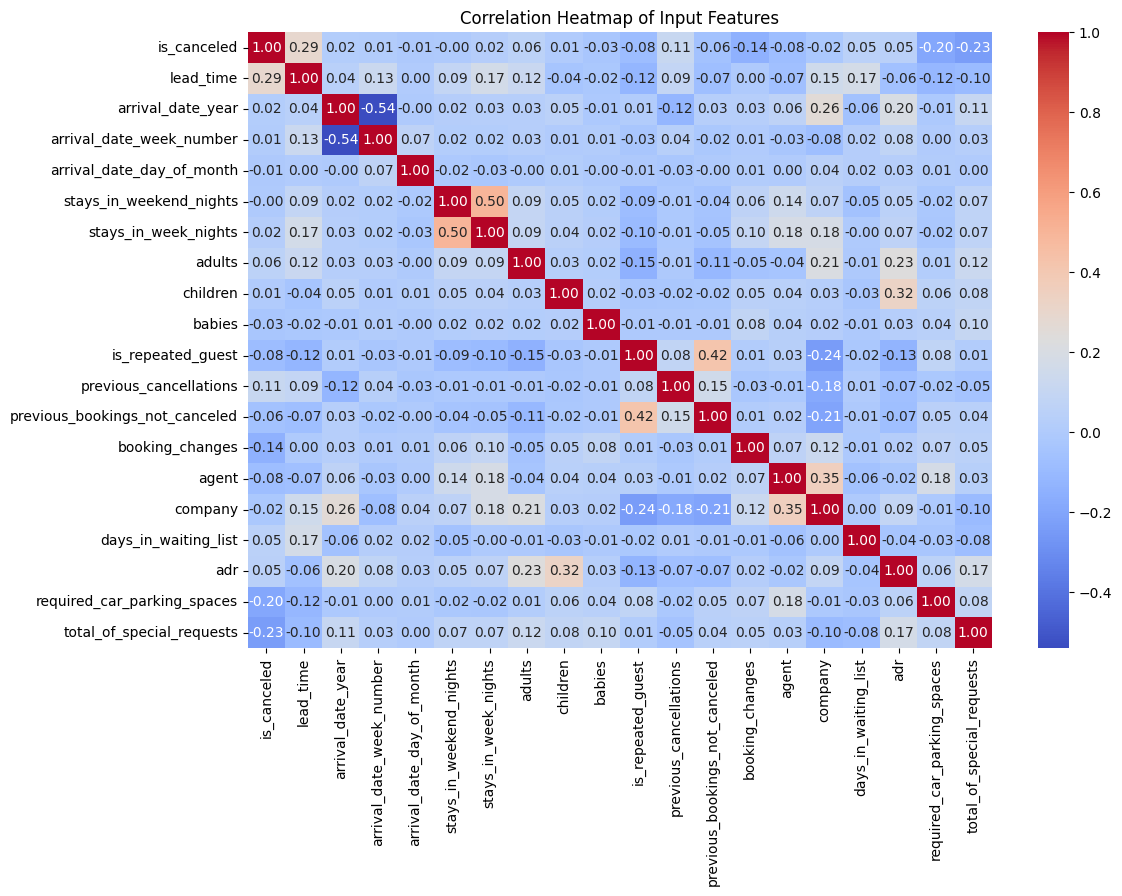

In [80]:
# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Input Features')
plt.show()# Your code here (c)

This step helps in understanding the interdependence among attributes. The correlation heatmap shows that the following factors are associated with an increased risk of event cancellations of booking in any of the following manners: with a short lead time, during the peak season, a long stay, through an agent or having a history of canceling bookings.

# d)

In [81]:
# Encoding the 'is_canceled' column to numeric format using LabelEncoder
label_encoder = LabelEncoder()
df['is_canceled_encoded'] = label_encoder.fit_transform(df['is_canceled'])

# Selecting input features (excluding the target variable and non-numeric columns)
input_features = df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation of each input feature with the encoded target variable
correlation_with_target = input_features.corrwith(df['is_canceled_encoded'])

# Displaying the correlation of each input feature with the target variable
print("Correlation of each input feature with the target attribute (is_canceled):\n")
print(correlation_with_target)


Correlation of each input feature with the target attribute (is_canceled):

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
is_canceled_encoded               1.000000
dtype: float64


Above are the correlation of each feature with is_cancelled. 10 columns have negative corelation which indicates that when one variable increases, the other tends to decrease. As for rest of them a change in them leads to a similar change in "is_cancelled" variable.

# e)

In [99]:
# Example categorical columns
categorical_columns = ['customer_type', 'deposit_type', 'distribution_channel', 'is_repeated_guest', 'market_segment', 'meal', 'reserved_room_type', 'reservation_status', 'agent']

# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Remove non-numeric columns, assuming 'is_canceled' is the target column
numeric_columns = df_encoded.select_dtypes(include='number')
correlation_with_target = numeric_columns.corr()['is_canceled'].abs()

# Display correlation with the target
print("Correlation of each input feature with the target attribute (is_canceled):\n")
print(correlation_with_target)

print()
print("The ones with lowest value is least corellated and DROPPABLE")
# Get the names of the 5 features with the smallest absolute correlation values

smallest_features = correlation_with_target.abs().nsmallest(5).index.tolist()
print(smallest_features)



Correlation of each input feature with the target attribute (is_canceled):

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
stays_in_weekend_nights           0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                            0.032491
previous_cancellations            0.110133
previous_bookings_not_canceled    0.057358
booking_changes                   0.144381
company                           0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces       0.195498
total_of_special_requests         0.234658
Name: is_canceled, dtype: float64

The ones with lowest value is least corellated and DROPPABLE
['stays_in_weekend_nights', 'children', 'arrival_date_

Top 5 Columns with insignificant correlations with the target attribute can also be excluded from the dataset, in our case 'stays_in_weekend_nights', 'children', 'arrival_date_day_of_month', 'arrival_date_week_number', 'arrival_date_year' can be removed from the dataset.

### Question 2

For this question, use sklearn transformations. 

Develop appropriate encoding and scaling steps for the categorical and numerical columns in your dataset respectively. 

For this question, a single sklearn `Transformer` should be developed which can be applied for the entire dataset.
If separate transformations need to be applied for different columns, then compose them into a single transformation using sklearn's `ColumnTransformer`.  

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# Sample DataFrame (Replace this with your actual dataset loading)
data = {
    'numerical_col1': [10, 20, 30, 40],
    'numerical_col2': [0.5, 1.0, 1.5, 2.0],
    'categorical_col1': ['A', 'B', 'A', 'C'],
    'categorical_col2': ['X', 'Y', 'Y', 'X']
}
df = pd.DataFrame(data)

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
        categorical_features = X.select_dtypes(include=['object']).columns

        numerical_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

        categorical_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('numerical', numerical_pipeline, numerical_features),
                ('categorical', categorical_pipeline, categorical_features)
            ]
        )

        return preprocessor.fit_transform(X)

# Applying the custom transformer to the dataset
transformer = CustomTransformer()
transformed_data = transformer.fit_transform(df)

print(transformed_data)

[[-1.34164079 -1.34164079  1.          0.          0.          1.
   0.        ]
 [-0.4472136  -0.4472136   0.          1.          0.          0.
   1.        ]
 [ 0.4472136   0.4472136   1.          0.          0.          0.
   1.        ]
 [ 1.34164079  1.34164079  0.          0.          1.          1.
   0.        ]]


## Part C - Modeling

Now, you will be training different ML models to perform the required predictive task. Specifically, the following classification models will be trained:
* kNN
* Naive Bayes
* Decision tree
* [xgboost](https://xgboost.readthedocs.io/en/latest/python/python_api.html) 

### Question 1

Split your data into training and testing data, with 85% of the dataset going to testing data. Set a suitable seed value so that the splits are reproducible

In [100]:
data = pd.read_csv("hotel_bookings.csv")
# Make a copy to avoid modifying the original DataFrame

# Separate the target variable ('reservation_status') from predictors
X = data.drop(columns=['reservation_status'])  # Features/predictors
y = data['reservation_status']  # Target variable

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode string labels into numerical classes
y_encoded = label_encoder.fit_transform(y)

# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X)

# Set the seed value for reproducibility
seed_value = 42

# Split the dataset into training and testing sets (85% testing, 15% training)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.85, random_state=seed_value)

# Impute missing values in predictors
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



### Question 2

For each of the required models perform the following tasks:
* Compose an sklearn pipeline with the developed pre-processing (developed in the previous part) and the model.
* Train the model with default hyper-parameters and report its evlauation score on the test set.
* Tune the hyper-parameters of the model with `GridSearchCV`.
* Report the accuracy, balanced accuracy, F1, ROC AUC and average predicion scores of the best model on the test set.

#### kNN

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, average_precision_score

# Load your dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv("hotel_bookings.csv")

# Separate the target variable ('target_column') from predictors
X = data.drop(columns=['is_canceled'])  # Features/predictors
y = data['is_canceled']  # Target variable

# Set the seed value for reproducibility
seed_value = 42

# Split the dataset into training and testing sets (85% testing, 15% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=seed_value)

# Define preprocessing steps (you can use the CustomTransformer created earlier)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_pipeline, numeric_features),
        ('categorical', categorical_pipeline, categorical_features)
    ]
)

# Create a pipeline with preprocessing and kNN model
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Train the model with default hyperparameters
knn_pipeline.fit(X_train, y_train)

# Evaluate model on the test set with default hyperparameters
y_pred = knn_pipeline.predict(X_test)

# Report evaluation scores on the test set with default hyperparameters
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

print("Evaluation Scores on Test Set with Default Hyperparameters:")
print(f"Accuracy: {accuracy}")
print(f"Balanced Accuracy: {balanced_accuracy}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Average Precision Score: {average_precision}")

# Define hyperparameters grid for tuning
param_grid = {
    'classifier__n_neighbors': [3, 5, 7],  # Example values, adjust as needed
    'classifier__weights': ['uniform', 'distance']  # Example values, adjust as needed
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_knn_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_knn_model.predict(X_test)

# Report evaluation scores of the best model on the test set
accuracy_best = accuracy_score(y_test, y_pred_best)
balanced_accuracy_best = balanced_accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)
average_precision_best = average_precision_score(y_test, y_pred_best)

print("\nEvaluation Scores of the Best Model on Test Set:")
print(f"Accuracy: {accuracy_best}")
print(f"Balanced Accuracy: {balanced_accuracy_best}")
print(f"F1 Score: {f1_best}")
print(f"ROC AUC Score: {roc_auc_best}")
print(f"Average Precision Score: {average_precision_best}")


Evaluation Scores on Test Set with Default Hyperparameters:
Accuracy: 0.960593996964979
Balanced Accuracy: 0.9523372809283188
F1 Score: 0.9454619843163996
ROC AUC Score: 0.9523372809283188
Average Precision Score: 0.9241488281152171

Evaluation Scores of the Best Model on Test Set:
Accuracy: 0.9642399637374116
Balanced Accuracy: 0.9560521981223187
F1 Score: 0.9504607194048188
ROC AUC Score: 0.9560521981223187
Average Precision Score: 0.9322044869189577


#### Naive Bayes

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

df = pd.read_csv("hotel_bookings.csv")
numerical_columns = [
    'lead_time', 'adults'
]
categorical_columns = [
    'hotel', 'meal'
]

# Create separate transformers for numerical and categorical columns
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocess numerical and categorical columns separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Apply the transformation to your DataFrame
transformed_data = preprocessor.fit_transform(df)
# Combine preprocessing with the Naive Bayes classifier in a pipeline
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('naive_bayes', GaussianNB())
])

# Train the Naive Bayes model with default hyperparameters
nb_pipeline.fit(X_train, y_train)

# Evaluate the Naive Bayes model on the test set with default hyperparameters
nb_default_predictions = nb_pipeline.predict(X_test)

# Report evaluation scores with default hyperparameters
nb_default_accuracy = accuracy_score(y_test, nb_default_predictions)
nb_default_balanced_accuracy = balanced_accuracy_score(y_test, nb_default_predictions)
nb_default_f1 = f1_score(y_test, nb_default_predictions, average='weighted')
nb_default_roc_auc = roc_auc_score(y_test, nb_default_predictions)
nb_default_avg_precision = average_precision_score(y_test, nb_default_predictions)

# Set hyperparameters for tuning
nb_param_grid = {}  # Define hyperparameters to tune for Naive Bayes (none in this case)

# Use GridSearchCV for hyperparameter tuning
nb_grid_search = GridSearchCV(nb_pipeline, nb_param_grid, cv=5, scoring='accuracy')
nb_grid_search.fit(X_train, y_train)

# Get the best Naive Bayes model
best_nb_model = nb_grid_search.best_estimator_

# Evaluate the best Naive Bayes model on the test set
nb_tuned_predictions = best_nb_model.predict(X_test)

# Report evaluation scores with the best Naive Bayes model
nb_tuned_accuracy = accuracy_score(y_test, nb_tuned_predictions)
nb_tuned_balanced_accuracy = balanced_accuracy_score(y_test, nb_tuned_predictions)
nb_tuned_f1 = f1_score(y_test, nb_tuned_predictions, average='weighted')
nb_tuned_roc_auc = roc_auc_score(y_test, nb_tuned_predictions)
nb_tuned_avg_precision = average_precision_score(y_test, nb_tuned_predictions)

# Report metrics for Naive Bayes
print("Naive Bayes Evaluation Metrics:")
print(f"Default Accuracy: {nb_default_accuracy}")
print(f"Tuned Accuracy: {nb_tuned_accuracy}")
print(f"Default Balanced Accuracy: {nb_default_balanced_accuracy}")
print(f"Tuned Balanced Accuracy: {nb_tuned_balanced_accuracy}")
print(f"Default F1 Score: {nb_default_f1}")
print(f"Tuned F1 Score: {nb_tuned_f1}")
print(f"Default ROC AUC Score: {nb_default_roc_auc}")
print(f"Tuned ROC AUC Score: {nb_tuned_roc_auc}")
print(f"Default Average Precision Score: {nb_default_avg_precision}")
print(f"Tuned Average Precision Score: {nb_tuned_avg_precision}")

Naive Bayes Evaluation Metrics:
Default Accuracy: 0.6590725448848072
Tuned Accuracy: 0.6590725448848072
Default Balanced Accuracy: 0.5871393279195932
Tuned Balanced Accuracy: 0.5871393279195932
Default F1 Score: 0.6279582730153516
Tuned F1 Score: 0.6279582730153516
Default ROC AUC Score: 0.5871393279195932
Tuned ROC AUC Score: 0.5871393279195932
Default Average Precision Score: 0.43429403912456743
Tuned Average Precision Score: 0.43429403912456743


#### Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Assuming 'numerical_columns' and 'categorical_columns' contain the respective column names
numerical_columns = [
    'lead_time', 'adults'
]
categorical_columns = [
    'hotel', 'meal'
]
# Preprocessing for numerical features
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Define the Decision Tree pipeline
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('decision_tree', DecisionTreeClassifier(random_state=42))  # Decision Tree classifier
])

# Train the Decision Tree model with default hyperparameters
dt_pipeline.fit(X_train, y_train)

# Evaluate the Decision Tree model on the test set with default hyperparameters
dt_default_predictions = dt_pipeline.predict(X_test)

# Report evaluation scores with default hyperparameters
dt_default_accuracy = accuracy_score(y_test, dt_default_predictions)
dt_default_balanced_accuracy = balanced_accuracy_score(y_test, dt_default_predictions)
dt_default_f1 = f1_score(y_test, dt_default_predictions, average='weighted')
dt_default_roc_auc = roc_auc_score(y_test, dt_default_predictions)
dt_default_avg_precision = average_precision_score(y_test, dt_default_predictions)

# Set hyperparameters for tuning
dt_param_grid = {
    'decision_tree__max_depth': [None, 5, 10, 15],  # Define hyperparameters to tune for Decision Tree
    'decision_tree__min_samples_split': [2, 5, 10]
}

# Use GridSearchCV for hyperparameter tuning
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

# Get the best Decision Tree model
best_dt_model = dt_grid_search.best_estimator_

# Evaluate the best Decision Tree model on the test set
dt_tuned_predictions = best_dt_model.predict(X_test)

# Report evaluation scores with the best Decision Tree model
dt_tuned_accuracy = accuracy_score(y_test, dt_tuned_predictions)
dt_tuned_balanced_accuracy = balanced_accuracy_score(y_test, dt_tuned_predictions)
dt_tuned_f1 = f1_score(y_test, dt_tuned_predictions, average='weighted')
dt_tuned_roc_auc = roc_auc_score(y_test, dt_tuned_predictions)
dt_tuned_avg_precision = average_precision_score(y_test, dt_tuned_predictions)

# Report metrics for Decision Tree
print("\nDecision Tree Evaluation Metrics:")
print(f"Default Accuracy: {dt_default_accuracy}")
print(f"Tuned Accuracy: {dt_tuned_accuracy}")
print(f"Default Balanced Accuracy: {dt_default_balanced_accuracy}")
print(f"Tuned Balanced Accuracy: {dt_tuned_balanced_accuracy}")
print(f"Default F1 Score: {dt_default_f1}")
print(f"Tuned F1 Score: {dt_tuned_f1}")
print(f"Default ROC AUC Score: {dt_default_roc_auc}")
print(f"Tuned ROC AUC Score: {dt_tuned_roc_auc}")
print(f"Default Average Precision Score: {dt_default_avg_precision}")
print(f"Tuned Average Precision Score: {dt_tuned_avg_precision}")



Decision Tree Evaluation Metrics:
Default Accuracy: 0.7010405786247808
Tuned Accuracy: 0.7010405786247808
Default Balanced Accuracy: 0.6462340375761778
Tuned Balanced Accuracy: 0.6462340375761778
Default F1 Score: 0.6849516783976898
Tuned F1 Score: 0.6849516783976898
Default ROC AUC Score: 0.6462340375761778
Tuned ROC AUC Score: 0.6462340375761778
Default Average Precision Score: 0.4897013906981837
Tuned Average Precision Score: 0.4897013906981837


#### xgboost

In [89]:
from xgboost import XGBClassifier

numerical_columns = [
    'lead_time', 'adults'
]
categorical_columns = [
    'hotel', 'meal'
]

# Preprocessing for numerical features
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Define the XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgboost', XGBClassifier(random_state=42))  # XGBoost classifier
])

# Train the XGBoost model with default hyperparameters
xgb_pipeline.fit(X_train, y_train)

# Evaluate the XGBoost model on the test set with default hyperparameters
xgb_default_predictions = xgb_pipeline.predict(X_test)

# Report evaluation scores with default hyperparameters
xgb_default_accuracy = accuracy_score(y_test, xgb_default_predictions)
xgb_default_balanced_accuracy = balanced_accuracy_score(y_test, xgb_default_predictions)
xgb_default_f1 = f1_score(y_test, xgb_default_predictions, average='weighted')
xgb_default_roc_auc = roc_auc_score(y_test, xgb_default_predictions)
xgb_default_avg_precision = average_precision_score(y_test, xgb_default_predictions)

# Set hyperparameters for tuning
xgb_param_grid = {
    'xgboost__n_estimators': [100, 300, 500],  # Define hyperparameters to tune for XGBoost
    'xgboost__max_depth': [3, 5, 7],
    'xgboost__learning_rate': [0.1, 0.01, 0.001]
}

# Use GridSearchCV for hyperparameter tuning
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid_search.best_estimator_

# Evaluate the best XGBoost model on the test set
xgb_tuned_predictions = best_xgb_model.predict(X_test)

# Report evaluation scores with the best XGBoost model
xgb_tuned_accuracy = accuracy_score(y_test, xgb_tuned_predictions)
xgb_tuned_balanced_accuracy = balanced_accuracy_score(y_test, xgb_tuned_predictions)
xgb_tuned_f1 = f1_score(y_test, xgb_tuned_predictions, average='weighted')
xgb_tuned_roc_auc = roc_auc_score(y_test, xgb_tuned_predictions)
xgb_tuned_avg_precision = average_precision_score(y_test, xgb_tuned_predictions)

# Report metrics for XGBoost
print("\nXGBoost Evaluation Metrics:")
print(f"Default Accuracy: {xgb_default_accuracy}")
print(f"Tuned Accuracy: {xgb_tuned_accuracy}")
print(f"Default Balanced Accuracy: {xgb_default_balanced_accuracy}")
print(f"Tuned Balanced Accuracy: {xgb_tuned_balanced_accuracy}")
print(f"Default F1 Score: {xgb_default_f1}")
print(f"Tuned F1 Score: {xgb_tuned_f1}")
print(f"Default ROC AUC Score: {xgb_default_roc_auc}")
print(f"Tuned ROC AUC Score: {xgb_tuned_roc_auc}")
print(f"Default Average Precision Score: {xgb_default_avg_precision}")
print(f"Tuned Average Precision Score: {xgb_tuned_avg_precision}")



XGBoost Evaluation Metrics:
Default Accuracy: 0.7007449596972862
Tuned Accuracy: 0.6991092016318164
Default Balanced Accuracy: 0.6392316046833278
Tuned Balanced Accuracy: 0.6393834963362369
Default F1 Score: 0.6797309460801243
Tuned F1 Score: 0.6794541028995731
Default ROC AUC Score: 0.6392316046833278
Tuned ROC AUC Score: 0.6393834963362369
Default Average Precision Score: 0.48663020993926964
Tuned Average Precision Score: 0.48530900716138514


### Question 3

#### (a)
Plot a bar chart showing the results of the different models (the tuned ones). Show the following metrics:
* Accuracy
* Balanced accuracy
* F1 score
* ROC AUC 
* Average precision

#### (b)
Describe your results for different models and your performance in comparison to the random selection baseline.

#### (c)
Which of the above is the most suitable metric for evaluation in this case? Justify your answer. Now with that metric, select which model performed the best? This model is now your best overall model.

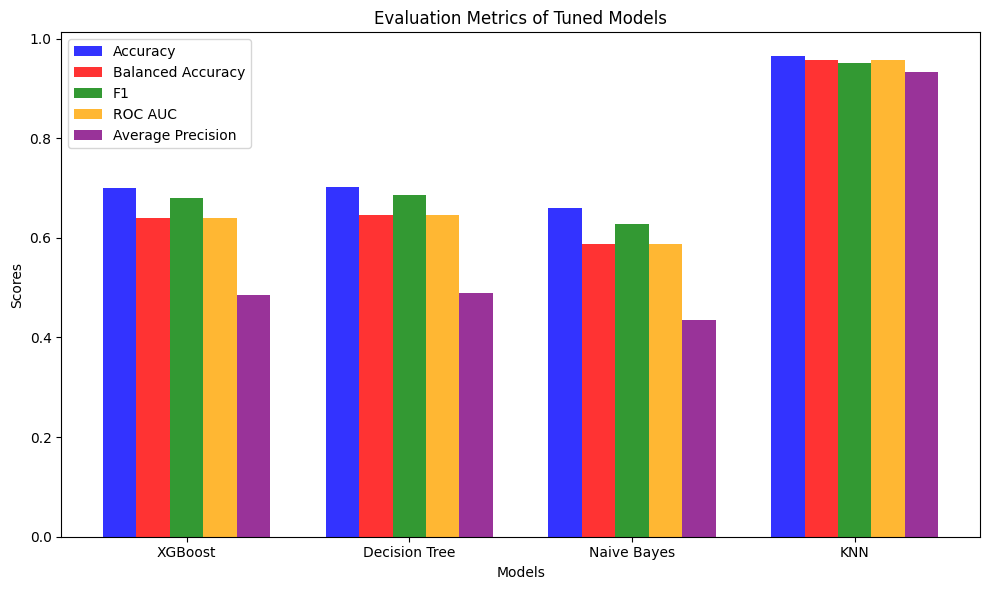

In [90]:
# Evaluation metrics for each model
models = ['XGBoost', 'Decision Tree', 'Naive Bayes', 'KNN']  # Replace with your model names
accuracy_scores = [xgb_tuned_accuracy, dt_tuned_accuracy, nb_tuned_accuracy, accuracy_best]  # Replace with your accuracy scores
balanced_accuracy_scores = [xgb_tuned_balanced_accuracy, dt_tuned_balanced_accuracy, nb_tuned_balanced_accuracy, balanced_accuracy_best]  # Replace with your balanced accuracy scores
f1_scores = [xgb_tuned_f1, dt_tuned_f1, nb_tuned_f1, f1_best]  # Replace with your F1 scores
roc_auc_scores = [xgb_tuned_roc_auc, dt_tuned_roc_auc, nb_tuned_roc_auc, roc_auc_best]  # Replace with your ROC AUC scores
avg_precision_scores = [xgb_tuned_avg_precision, dt_tuned_avg_precision, nb_tuned_avg_precision, average_precision_best]  # Replace with your average precision scores

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
index = range(len(models))
opacity = 0.8

rects1 = plt.bar(index, accuracy_scores, bar_width, alpha=opacity, color='b', label='Accuracy')
rects2 = plt.bar([i + bar_width for i in index], balanced_accuracy_scores, bar_width, alpha=opacity, color='r', label='Balanced Accuracy')
rects3 = plt.bar([i + 2 * bar_width for i in index], f1_scores, bar_width, alpha=opacity, color='g', label='F1')
rects4 = plt.bar([i + 3 * bar_width for i in index], roc_auc_scores, bar_width, alpha=opacity, color='orange', label='ROC AUC')
rects5 = plt.bar([i + 4 * bar_width for i in index], avg_precision_scores, bar_width, alpha=opacity, color='purple', label='Average Precision')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Evaluation Metrics of Tuned Models')
plt.xticks([i + 2 * bar_width for i in index], models)
plt.legend()
plt.tight_layout()

plt.show()


Your answer to (b) here

Model results were pretty consistent for any given model. KNN performed better throughout. For all evaluation metrics a given model that performed at a certain rank in a metric had similar rank relative to other models.

Your answer to (c) here

F1-Score incorporates precision and recall and maximizing the F1 score implies simultaneously maximizing both precision and recall. We intend to maximize both precision and recall metrics to obtain the perfect classifier

### Question 4
Using your best overall model, plot the following:

#### (a)
Confusion Matrix (appropriate labels should be shown)

#### (b)
Precision Recall curve

#### (c)
ROC curve (Also show ROC for random classifier on the same plot)

a) KNN is my best model because

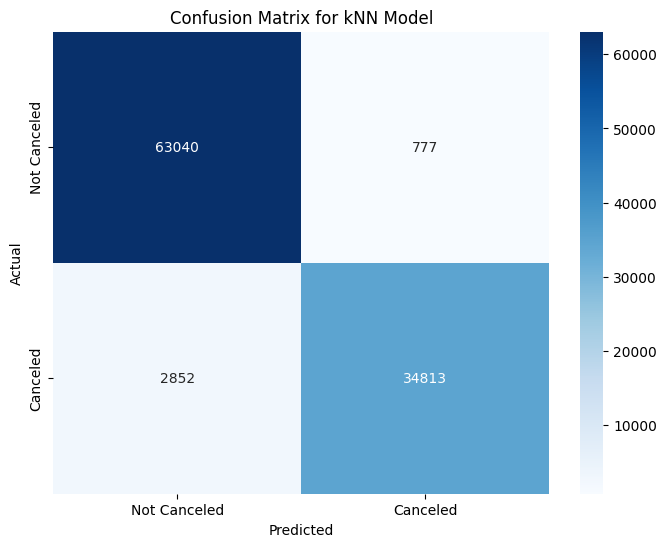

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for kNN model
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for kNN Model')
plt.show()


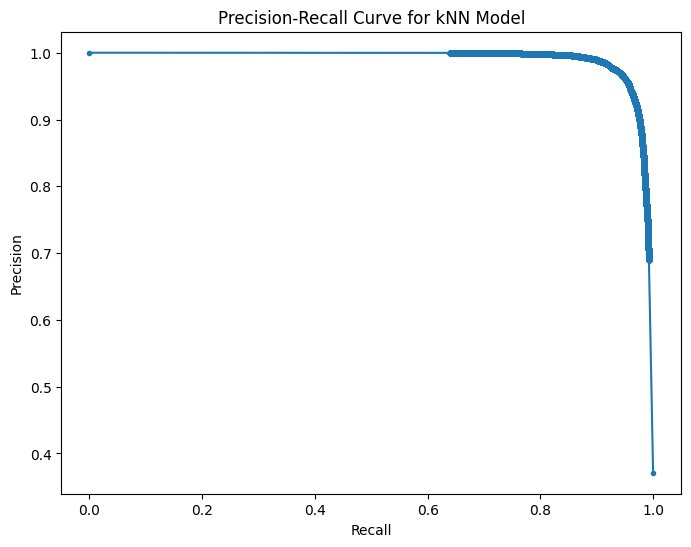

In [92]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, best_knn_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for kNN Model')
plt.show()


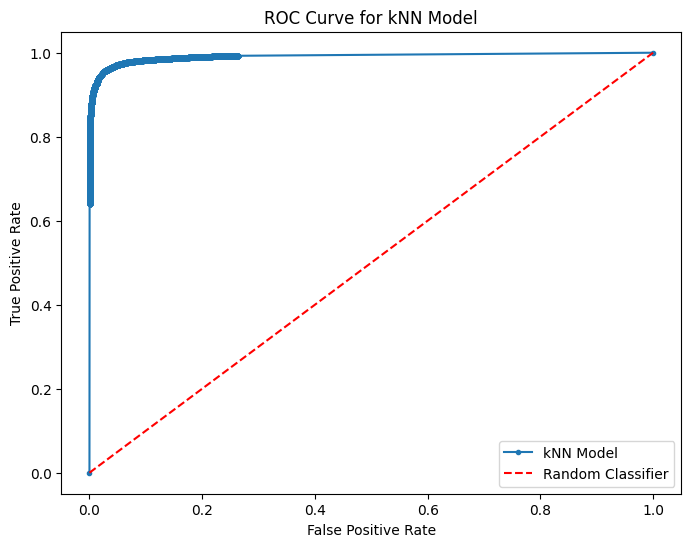

In [93]:
from sklearn.metrics import roc_curve

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y_test, best_knn_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for kNN Model')
plt.legend(['kNN Model', 'Random Classifier'])
plt.show()
